# Running the model

In [1]:
%config Completer.use_jedi=False

%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")
from io import BytesIO

In [3]:
import base64
import requests
import torch
import os
import numpy as np
import argparse
from PIL import Image
import torchvision.transforms as transforms
from torch.autograd import Variable
from network.Transformer import Transformer

from tqdm import tqdm_notebook
from test_from_code import transform

  0%|          | 0/4 [00:00<?, ?it/s]

./cartoongan/pretrained_models/Hosoda_net_G_float.pth
./cartoongan/pretrained_models/Hayao_net_G_float.pth
./cartoongan/pretrained_models/Shinkai_net_G_float.pth
./cartoongan/pretrained_models/Paprika_net_G_float.pth
finish


In [4]:
styles = ["Hosoda", "Hayao", "Shinkai", "Paprika"]

models = {}

for style in tqdm_notebook(styles):
    model = Transformer()
    model.load_state_dict(torch.load(os.path.join("./../pretrained_models/", style + '_net_G_float.pth')))
    model.eval()
    models[style] = model

C:\Users\Samant Giri\AppData\Local\Temp\ipykernel_21200\2246372326.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for style in tqdm_notebook(styles):


  0%|          | 0/4 [00:00<?, ?it/s]

In [19]:
path = "../../test-images/man.jpg"

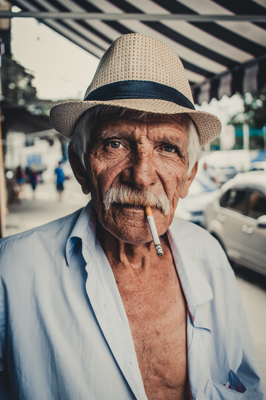

In [22]:
from PIL import Image
load_size =400
input_image = Image.open(path)
h, w = input_image.size

ratio = h * 1.0 / w

if ratio > 1:
    h = load_size
    w = int(h * 1.0 / ratio)
else:
    w = load_size
    h = int(w * ratio)

input_image = input_image.resize((h, w), Image.BICUBIC)
input_image

In [7]:
### pick a style in : ["Hosoda", "Hayao", "Shinkai", "Paprika"]

In [23]:

load_size = 400

In [43]:
%%time
output1 = transform("Hosoda", path, models, load_size)

input shape torch.Size([1, 3, 400, 266])
inference time took 3.663752794265747 s
CPU times: total: 31 s
Wall time: 4.42 s


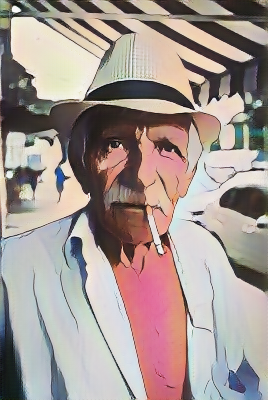

In [44]:
output1

In [32]:
%%time
output2 = transform("Hayao", path, models, load_size=400)

input shape torch.Size([1, 3, 400, 266])
inference time took 3.332357406616211 s
CPU times: total: 26.8 s
Wall time: 3.86 s


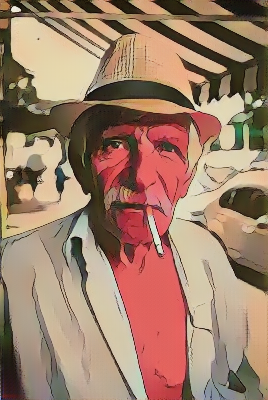

In [33]:
output2

In [37]:
%%time

output3 = transform("Shinkai", path, models, load_size=400)

input shape torch.Size([1, 3, 400, 266])
inference time took 3.453737258911133 s
CPU times: total: 30 s
Wall time: 4.24 s


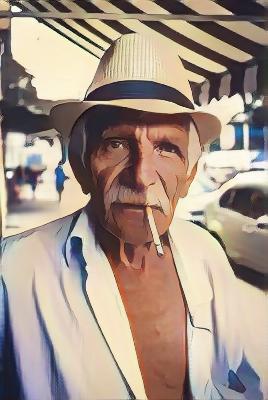

In [38]:
output3

In [40]:
output4 = transform("Paprika", path, models, load_size=400)

input shape torch.Size([1, 3, 400, 266])
inference time took 2.559384822845459 s


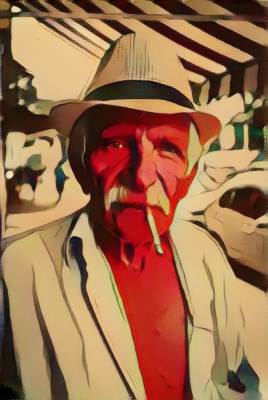

In [41]:
output4

## Use the deployed API

In this section, you'll have to put in your API URL

In [15]:
path = '../../test-images/paris.jpg'

#path = "/Users/ahmedbesbes/Downloads/peinture.JPG"

img = Image.open(path)
with open(path, "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read()).decode('utf-8')

url = "https://tbuxfdm545.execute-api.eu-west-3.amazonaws.com/dev/transform"

data = {
    "image": encoded_string,
    "model_id": 1,
    "load_size": 500
}

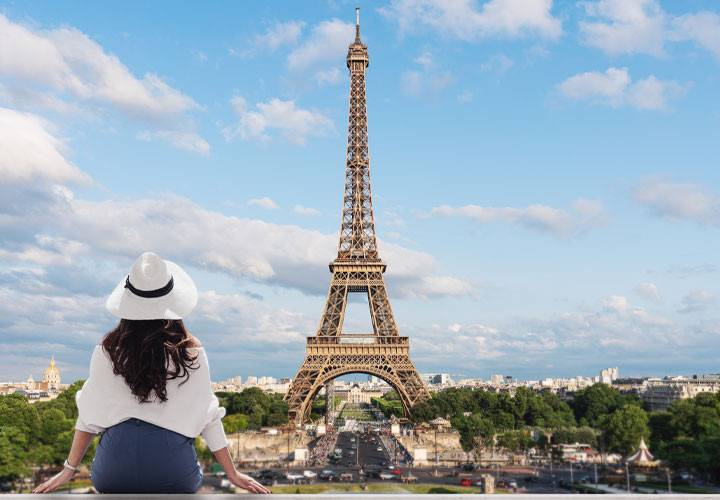

In [16]:
img

In [17]:
#%%time
#response = requests.post(url, json=data, timeout=600)

import time

response = requests.post(url, json=data)
while response == '':
    try:
        response = requests.post(url, json=data)
        break
    except:
        print("Connection refused by the server..")
        print("Let me sleep for 5 seconds")
        print("ZZzzzz...")
        time.sleep(5)
        print("Was a nice sleep, now let me continue...")
        continue

ConnectionError: HTTPSConnectionPool(host='tbuxfdm545.execute-api.eu-west-3.amazonaws.com', port=443): Max retries exceeded with url: /dev/transform (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x00000143A876E300>: Failed to resolve 'tbuxfdm545.execute-api.eu-west-3.amazonaws.com' ([Errno 11001] getaddrinfo failed)"))

In [20]:
image = response.json()["output"]

image = image[image.find(",")+1:]
dec = base64.b64decode(image + "===")

image = Image.open(BytesIO(dec))

NameError: name 'response' is not defined

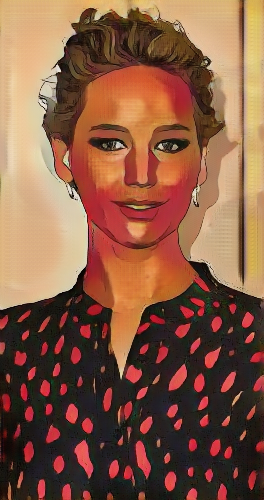

In [29]:
image